<a href="https://colab.research.google.com/github/GustavoOliveira345/Machine-Learning/blob/main/Price_laptops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Laptop Price

Previsão de preços de notebooks

 - Usando pandas pra extrair informações, e verifcar valores nulos
 - Utilizando Matplotlib e Seaborn para criar gráficos
 - Aplicando a função logaritma para melhorar a dispersão dos valores
 - Usando train_test_split
 - Fazendo codificação das colunas com BinaryEncoder
 - Aplicando StandardScaler para padronizar os dados
 - criando novos recursos com PolynomialFeatures, para criar um modelo linear melhor
 - Algoritmos como: LinearRegression, DecisionTreeRegressor, e RandomForestRegressor para previsão
 - Métrica r2_score
 - E validação cruzada

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer
pj = pd.read_csv('/content/Laptop_price2.csv')
pj.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [ ]:
pj.value_counts('Brand')

Brand
Dell      210
Asus      206
Acer      204
HP        190
Lenovo    190
Name: count, dtype: int64

In [ ]:
pj.isnull().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [ ]:
pj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [ ]:
pj.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


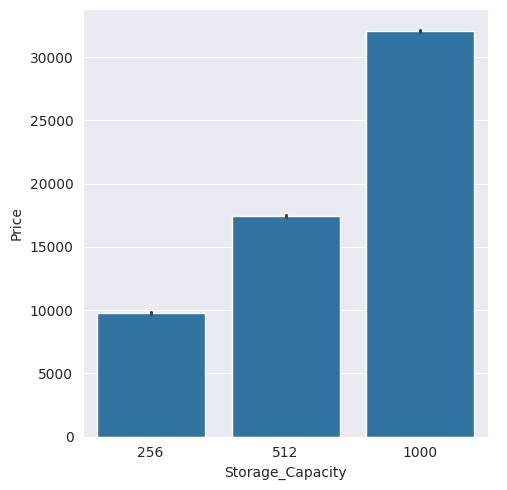

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.catplot(
    data=pj,
    x='Storage_Capacity',
    y='Price',
    kind='bar'
)


In [ ]:
x = pj.drop(columns='Price', axis=1)
y = pj['Price']

In [ ]:
x.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight'],
      dtype='object')

<Axes: >

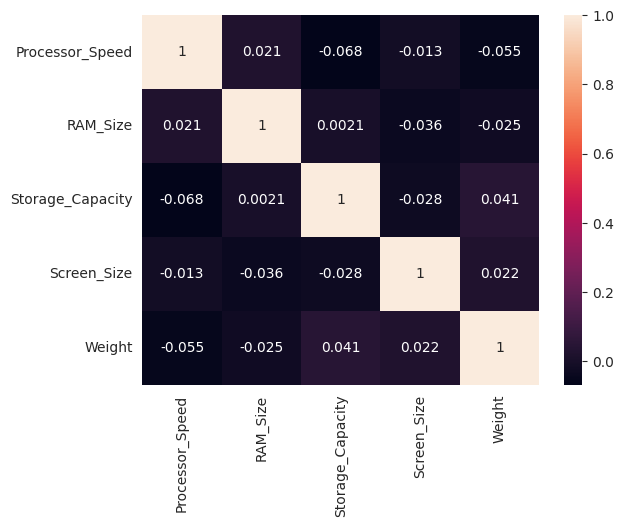

In [ ]:
import seaborn as sns
variables = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight']
lp = x[variables]
ko = lp.corr()
sns.heatmap(ko, annot=True)

array([[<Axes: title={'center': 'Processor_Speed'}>,
        <Axes: title={'center': 'RAM_Size'}>],
       [<Axes: title={'center': 'Storage_Capacity'}>,
        <Axes: title={'center': 'Screen_Size'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >]], dtype=object)

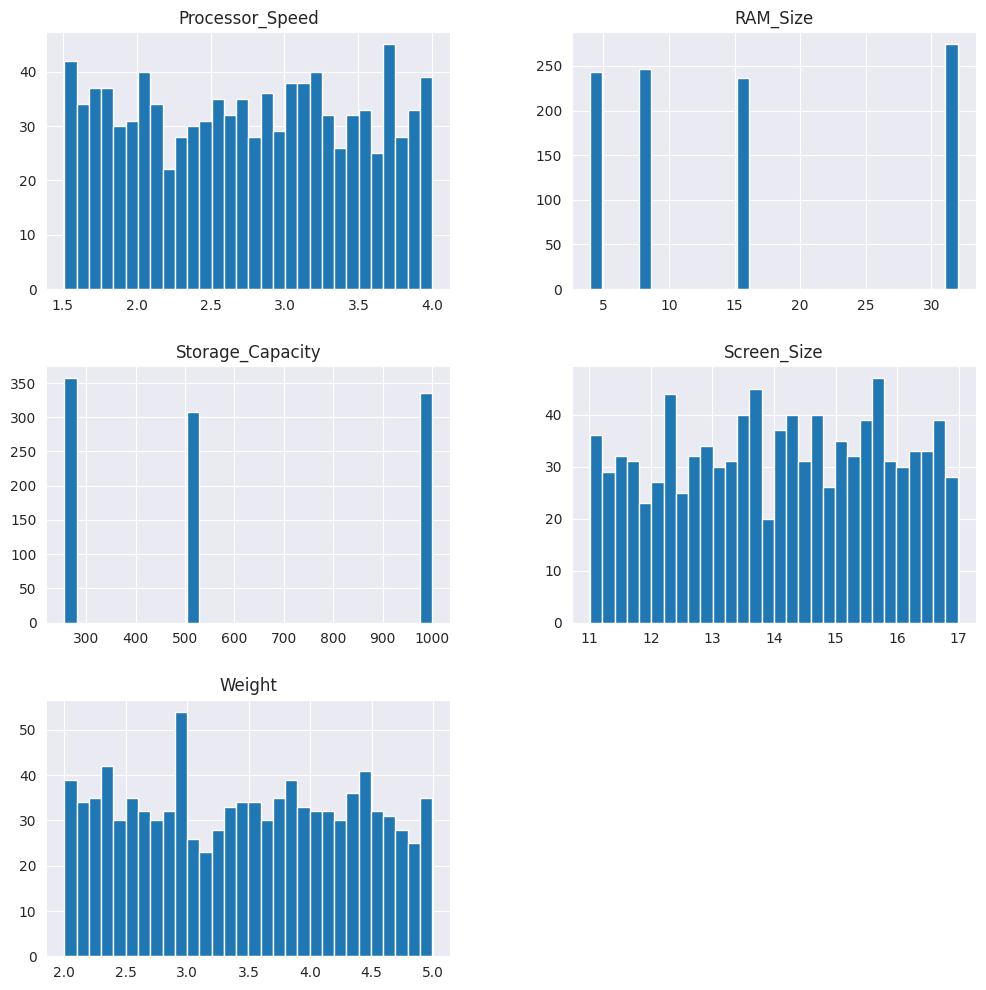

In [ ]:
x.hist(bins=30, figsize=(12,12))

In [ ]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
x_tf = x.copy()
variables = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight']
transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)
x_tf[variables] = transformer.transform(x[variables])

array([[<Axes: title={'center': 'Processor_Speed'}>,
        <Axes: title={'center': 'RAM_Size'}>],
       [<Axes: title={'center': 'Storage_Capacity'}>,
        <Axes: title={'center': 'Screen_Size'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >]], dtype=object)

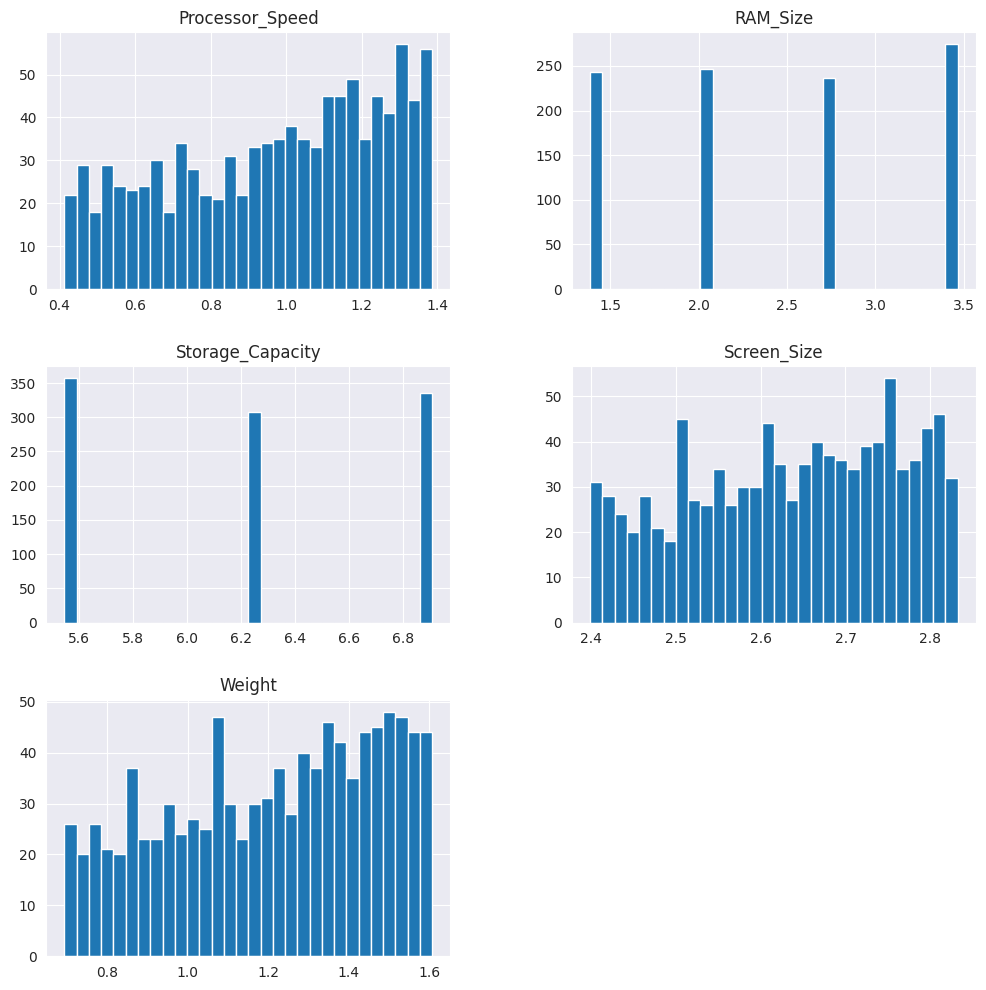

In [ ]:
x_tf.hist(bins=30, figsize=(12,12) )

In [ ]:
x_tf.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
0,Asus,1.342942,2.772589,6.238325,2.414587,0.971193
1,Acer,1.069126,1.386294,6.907755,2.425809,1.181731
2,Lenovo,1.176075,1.386294,5.545177,2.472583,0.707573
3,Acer,1.336644,2.772589,6.238325,2.508001,1.520359
4,Acer,1.184208,3.465736,6.907755,2.707442,1.433529


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_tf,y, test_size=0.2, random_state=42)
encoder = BinaryEncoder(cols=["Brand"], drop_invariant=True)
encoder.fit(x_train)
x_train_bin = encoder.transform(x_train)
x_test_bin = encoder.transform(x_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
std = StandardScaler()
xtrains = std.fit_transform(x_train_bin)
xtests = std.transform(x_test_bin)
pol = PolynomialFeatures(degree=2)
pol.fit(xtrains)
xtrainp = pol.transform(xtrains)
xtestp = pol.transform(xtests)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
lin = LinearRegression()
rid = Ridge(alpha=0.5)
lin.fit(xtrainp, y_train)
ko = lin.predict(xtestp)
ok = r2_score(ko, y_test)
nh = lin.predict(xtrainp)
hn = r2_score(nh, y_train)
print(ok)
print(hn)

0.9996293399005843
0.9995559682937429


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec = DecisionTreeRegressor(max_depth=2)
dec.fit(xtrainp, y_train)
hu = dec.predict(xtestp)
uh = r2_score(hu, y_test)
tg = dec.predict(xtrainp)
gt = r2_score(tg, y_train)
print(uh)
print(gt)

0.9968109359457242
0.9968321925138183


In [ ]:
from sklearn.ensemble import RandomForestRegressor
ref = RandomForestRegressor()
ref.fit(xtrainp, y_train)
ko = ref.predict(xtestp)
ok = r2_score(ko, y_test)
gt = ref.predict(xtrainp)
tg = r2_score(gt, y_train)
print(ok)
print(tg)

0.9995633363058422
0.9999172894534538


In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ref, xtrainp, y_train, cv=3)
print(score)
print(score.mean())

[0.99923106 0.99940124 0.9994741 ]
0.9993687990383503
